In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('/Users/hrushikeshnayak/Desktop/assignment/YOLO/images.jpeg')

In [3]:
image.shape

(183, 275, 3)

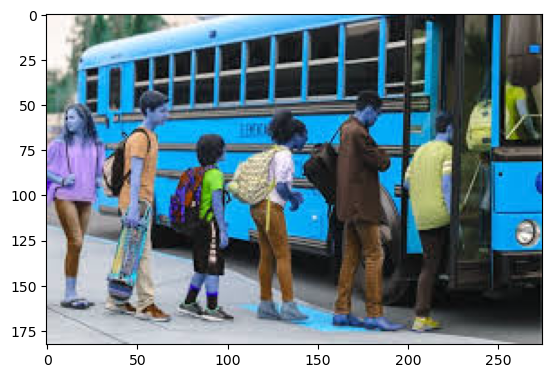

In [4]:
plt.imshow(image)

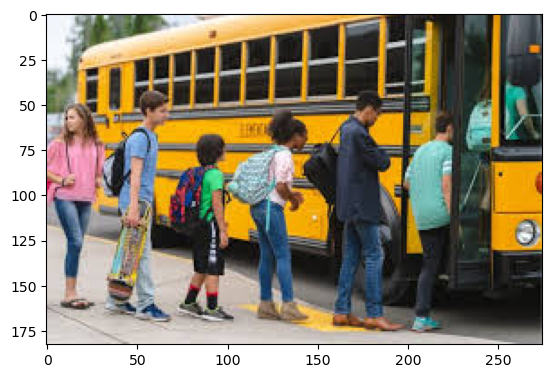

In [5]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [6]:
r,g,b =cv2.split(img)
print('r', r.shape)
print('g', g.shape)
print('b', b.shape)

r (183, 275)
g (183, 275)
b (183, 275)


In [7]:
# Define the paths to the YOLO model's configuration file and weights
yolo_config = '/Users/hrushikeshnayak/Desktop/assignment/YOLO/yolov3.cfg'
yolo_weights = '/Users/hrushikeshnayak/Desktop/assignment/YOLO/yolov3.weights'

# Load the YOLO model
yolo = cv2.dnn.readNet(yolo_weights, yolo_config)


In [8]:
classes =[]
with open("/Users/hrushikeshnayak/Desktop/assignment/YOLO/coco.names", 'r') as f:
    classes = f.read().splitlines()

In [9]:
len(classes)

80

In [10]:
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop = False)

In [11]:
blob.shape

(1, 3, 320, 320)

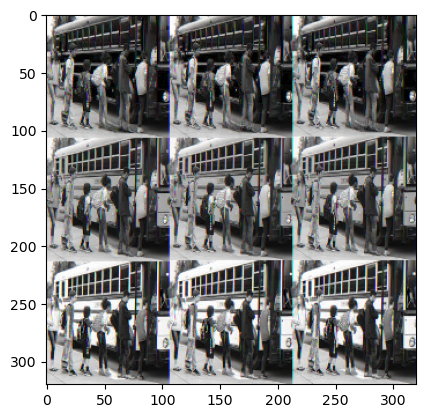

In [12]:
i = blob[0].reshape(320,320, 3)
plt.imshow(i)

In [13]:
yolo.setInput(blob)

In [14]:
output_layer_names = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_names)


In [15]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence_val = score[class_id]
        
        if confidence_val > 0.7:
            # Assuming image is loaded previously
            height, width, _ = img.shape
            
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x, y, w, h])
            confidences.append(confidence_val)
            class_ids.append(class_id)


In [16]:
len(boxes)

22

In [17]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [18]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3) )

In [19]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]
    
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 1)
    cv2.putText(img, label + " " + confi, (x, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)



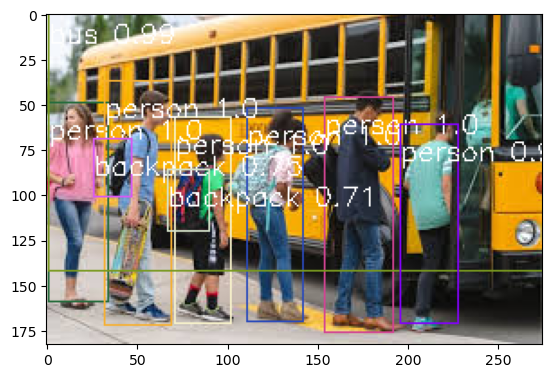

In [20]:
plt.imshow(img)